## Task 3 - To Explore Unsupervised Machine Learning

## Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from sklearn import datasets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the data

In [2]:
iris=datasets.load_iris()
X=iris.data
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.shape

(150, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Visualizing the Data

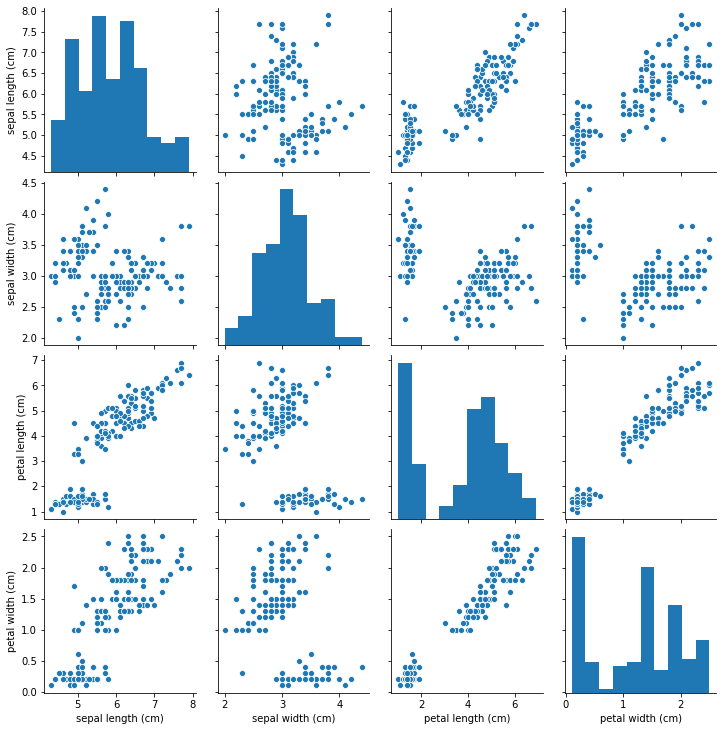

In [8]:
sns.pairplot(df )

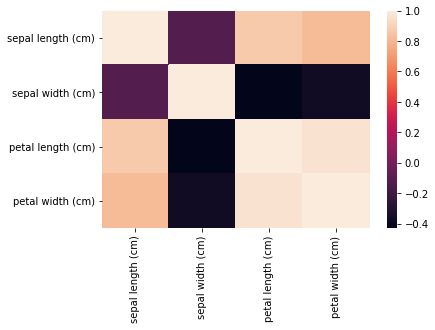

In [9]:
sns.heatmap(df.corr())

## Clustering
##### Finding the optimal number of clusters using KMeans Algorithm and plotting an elbow graph

Text(0.5, 1.0, 'The Elbow method showing the optimal K Value:')

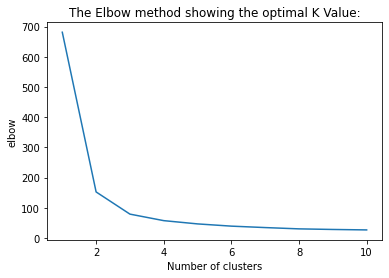

In [15]:
from sklearn.cluster import KMeans
elbow=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(df)
  elbow.append(kmeans.inertia_)
plt.plot(range(1,11),elbow)
plt.xlabel("Number of clusters")
plt.ylabel("elbow")
plt.title("The Elbow method showing the optimal K Value:")

In [17]:

y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Plotting The Clustered Data

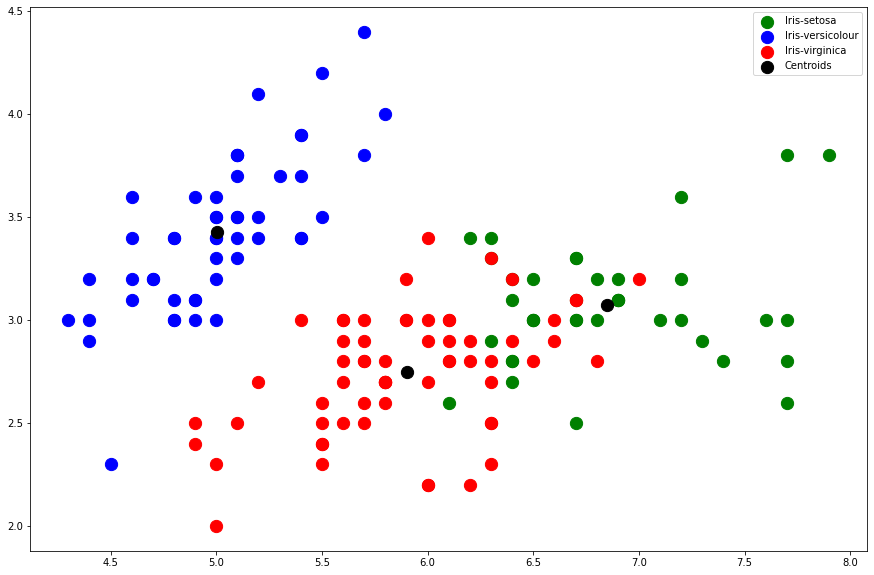

In [23]:
df=np.array(df)
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], 
            s = 150, c = 'green', label = 'Iris-setosa')

plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], 
            s =150, c = 'blue', label = 'Iris-versicolour')

plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1],
            s =150, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 150, c = 'black', label = 'Centroids')

plt.legend()

pyplot.rcParams['figure.figsize'] = (15, 10)